## Etude de l'impactes des lanes sur le jeux

Est ce que certaine sont plus impactante sur le cours d'une partie que d'autre.

Evaluation de l'impacte de la destruction des structure, nombre de kills et golds.

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

#Data need: Kills, golds, structure, infomatch, champions.
path_kill = "../../Data/DataRaw/set_kills.csv"
path_date = "../../Data/DataRework/set_addressDate.csv"
path_champions = "../../Data/DataRaw/set_infoChamp.csv"
path_infoMatch = "../../Data/DataRework/set_infoMatchRewok.csv"
path_golds = "../../Data/DataRaw/set_gold.csv"
path_joinData = "../../Data/DataRework/set_joinData.csv"
path_structure = "../../Data/DataRaw/set_structures.csv"
path_date = "../../Data/DataRework/set_addressDate.csv"



df_kills = pd.read_csv(path_kill)
df_date = pd.read_csv(path_date)
df_champions = pd.read_csv(path_champions)
df_infoMatch = pd.read_csv(path_infoMatch)
df_golds = pd.read_csv(path_golds)
df_structure = pd.read_csv(path_structure)
df_joinData = pd.read_csv(path_joinData)
df_date = pd.read_csv(path_date)

#Add date to structure
df_structure = df_structure.merge(right=df_date, right_on="Address", left_on="Address", how="left")

# Set the datetime columns
df_kills.Date = pd.to_datetime(df_kills.Date)
df_date.Date = pd.to_datetime(df_date.Date)
df_champions.ReleaseDate = pd.to_datetime(df_champions.ReleaseDate)
df_infoMatch.Date = pd.to_datetime(df_infoMatch.Date)
df_joinData.Date = pd.to_datetime(df_joinData.Date)
df_structure.Date = pd.to_datetime(df_structure.Date)



##Lower the case of string for futher problem
df_champions["Champions"] = df_champions["Champions"].str.lower()



In [3]:
df_kills.head()

Unnamed: 0                                            Address    Team  \
0           0  http://matchhistory.na.leagueoflegends.com/en/...  bKills   
1           1  http://matchhistory.na.leagueoflegends.com/en/...  bKills   
2           2  http://matchhistory.na.leagueoflegends.com/en/...  bKills   
3           3  http://matchhistory.na.leagueoflegends.com/en/...  bKills   
4           4  http://matchhistory.na.leagueoflegends.com/en/...  bKills   

     Time          Victim          Killer      Assist_1        Assist_2  \
0  10.820          C9 Hai    TSM Bjergsen           NaN             NaN   
1  16.286  C9 LemonNation  TSM WildTurtle  TSM Santorin    TSM Bjergsen   
2  18.733          C9 Hai    TSM Bjergsen  TSM Santorin  TSM WildTurtle   
3  18.880       C9 Meteos       TSM Dyrus  TSM Santorin    TSM Bjergsen   
4  27.005        C9 Balls    TSM Bjergsen     TSM Dyrus    TSM Santorin   

         Assist_3     Assist_4  x_pos y_pos       Date  
0             NaN          NaN   9229  8469 2015-01-24  
1     TSM Lustboy          NaN  13908  5960 2015-01-24  
2     TSM Lustboy          NaN   8281  7889 2015-01-24  
3  TSM WildTurtle  TSM Lustboy   8522  8895 2015-01-24  
4  TSM WildTurtle  TSM Lustboy   8902  7643 2015-01-24

In [4]:
df_date.head()

Address       Date
0  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-24
1  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-24
2  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-25
3  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-25
4  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-25

In [5]:
df_champions.head()

Champions PrimaryClass SecondaryClass ReleaseDate
0    aatrox   Juggernaut            NaN  2013-06-13
1      ahri        Burst            NaN  2011-12-14
2     akali     Assassin            NaN  2010-05-11
3   alistar     Vanguard            NaN  2009-02-21
4     amumu     Vanguard            NaN  2009-06-26

In [6]:
df_infoMatch.head()

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0  NALCS  2015  Spring  Season         TSM        1        0         C9   
1  NALCS  2015  Spring  Season         CST        0        1        DIG   
2  NALCS  2015  Spring  Season         WFX        1        0         GV   
3  NALCS  2015  Spring  Season         TIP        0        1         TL   
4  NALCS  2015  Spring  Season         CLG        1        0         T8   

   gamelength  blueTop  ...     redJungle redJungleChamp redMiddle  \
0          40    Dyrus  ...        Meteos          Elise       Hai   
1          38     Cris  ...       Crumbzz       JarvanIV  Shiphtur   
2          40  Flaresz  ...  Saintvicious         LeeSin     Keane   
3          41     Rhux  ...    IWDominate           Nunu     Fenix   
4          35    Benny  ...     Porpoise8         RekSai  Slooshi8   

  redMiddleChamp        redADC redADCChamp   redSupport redSupportChamp  \
0           Fizz        Sneaky       Sivir  LemonNation          Thresh   
1           Azir        CoreJJ       Corki      KiWiKiD           Annie   
2           Azir           Cop       Corki   BunnyFuFuu           Janna   
3           Lulu         KEITH      KogMaw      Xpecial           Janna   
4           Lulu  Maplestreet8       Corki        Dodo8           Annie   

                                             Address       Date  
0  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-24  
1  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-24  
2  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-25  
3  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-25  
4  http://matchhistory.na.leagueoflegends.com/en/... 2015-01-25  

[5 rows x 31 columns]

In [7]:
df_infoMatch.iloc[7523].Address

'http://matchhistory.na.leagueoflegends.com/en/#match-details/TRTW/1300116?gameHash=e9557881edc35ce4'

In [8]:
df_infoMatch.gamelength.median()

36.0

In [9]:
df_infoMatch.gamelength.mode()

0    34
dtype: int64

In [10]:
df_golds.head()

Address      Type  min_1  min_2  \
0  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
1  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
2  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
3  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
4  http://matchhistory.na.leagueoflegends.com/en/...  golddiff     40     40   

   min_3  min_4  min_5  min_6  min_7  min_8  ...  min_86  min_87  min_88  \
0    -14    -65   -268   -431   -488   -789  ...     NaN     NaN     NaN   
1    -26    -18    147    237   -152     18  ...     NaN     NaN     NaN   
2     10    -60     34     37    589   1064  ...     NaN     NaN     NaN   
3    -15     25    228     -6   -243    175  ...     NaN     NaN     NaN   
4     44    -36    113    158   -121   -191  ...     NaN     NaN     NaN   

   min_89  min_90  min_91  min_92  min_93  min_94  min_95  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 97 columns]

In [11]:
df_structure.head()

Address     Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   
2  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  33.583   
3  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  23.038   
4  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  16.556   

       Lane          Type       Date  
0  MID_LANE   BASE_TURRET 2015-01-24  
1  MID_LANE  NEXUS_TURRET 2015-01-24  
2  BOT_LANE  INNER_TURRET 2015-01-24  
3  TOP_LANE  INNER_TURRET 2015-01-24  
4  BOT_LANE  OUTER_TURRET 2015-01-24

In [39]:
tt_tepms = df_structure[df_structure.Lane == "TOP_LANE"].copy()

tt_tepms.Time = tt_tepms.Time.round(0)

tt_tepms = pd.pivot_table(tt_tepms, index="Time",aggfunc="count")

tt_tepms

Address  Date  Lane  Team  Type
Time                                 
3.0       237   237   237   237   237
4.0       805   805   805   805   805
5.0       124   124   124   124   124
6.0       501   501   501   501   501
7.0       155   155   155   155   155
...       ...   ...   ...   ...   ...
69.0        4     4     4     4     4
70.0        4     4     4     4     4
71.0        2     2     2     2     2
72.0        3     3     3     3     3
73.0        1     1     1     1     1

[71 rows x 5 columns]

In [25]:
tt_tepms


Address     Team  Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  28.0   
1       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.0   
5       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  15.0   
6       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.0   
7       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  15.0   
...                                                   ...      ...   ...   
121373  https://matchhistory.euw.leagueoflegends.com/e...  rInhibs  35.0   
121376  https://matchhistory.euw.leagueoflegends.com/e...  rInhibs  30.0   
121378  https://matchhistory.euw.leagueoflegends.com/e...  rInhibs  38.0   
121379  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  24.0   
121385  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  38.0   

            Lane          Type       Date  
0       MID_LANE   BASE_TURRET 2015-01-24  
1       MID_LANE  NEXUS_TURRET 2015-01-24  
5       MID_LANE  OUTER_TURRET 2015-01-24  
6       MID_LANE  NEXUS_TURRET 2015-01-24  
7       MID_LANE  INNER_TURRET 2015-01-24  
...          ...           ...        ...  
121373  MID_LANE     INHIBITOR 2018-01-28  
121376  MID_LANE     INHIBITOR 2018-01-28  
121378  MID_LANE     INHIBITOR 2018-01-28  
121379  MID_LANE     INHIBITOR 2018-01-28  
121385  MID_LANE     INHIBITOR 2018-01-28  

[51454 rows x 6 columns]

In [12]:
df_joinData.head()

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0  NALCS  2015  Spring  Season         TSM        1        0         C9   
1  NALCS  2015  Spring  Season         CST        0        1        DIG   
2  NALCS  2015  Spring  Season         WFX        1        0         GV   
3  NALCS  2015  Spring  Season         TIP        0        1         TL   
4  NALCS  2015  Spring  Season         CLG        1        0         T8   

   gamelength                                           golddiff  ...  \
0          40  [0, 0, -14, -65, -268, -431, -488, -789, -494,...  ...   
1          38  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...  ...   
2          40  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...  ...   
3          41  [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...  ...   
4          35  [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...  ...   

         redADC redADCChamp  \
0        Sneaky       Sivir   
1        CoreJJ       Corki   
2           Cop       Corki   
3         KEITH      KogMaw   
4  Maplestreet8       Corki   

                                          goldredADC   redSupport  \
0  [475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...  LemonNation   
1  [475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...      KiWiKiD   
2  [475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...   BunnyFuFuu   
3  [475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...      Xpecial   
4  [475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...        Dodo8   

  redSupportChamp                                     goldredSupport  \
0          Thresh  [515, 515, 577, 722, 911, 1042, 1194, 1370, 14...   
1           Annie  [515, 515, 583, 752, 900, 1066, 1236, 1417, 15...   
2           Janna  [515, 515, 584, 721, 858, 1002, 1168, 1303, 14...   
3           Janna  [515, 515, 583, 721, 870, 1059, 1205, 1342, 15...   
4           Annie  [475, 475, 538, 671, 817, 948, 1104, 1240, 136...   

                              redBans  \
0  ['Tristana', 'Leblanc', 'Nidalee']   
1      ['RekSai', 'Janna', 'Leblanc']   
2        ['Leblanc', 'Zed', 'RekSai']   
3      ['RekSai', 'Rumble', 'LeeSin']   
4       ['Rumble', 'Sivir', 'Rengar']   

                                             Address TeamWin       Date  
0  http://matchhistory.na.leagueoflegends.com/en/...    Blue 2015-01-24  
1  http://matchhistory.na.leagueoflegends.com/en/...     Red 2015-01-24  
2  http://matchhistory.na.leagueoflegends.com/en/...    Blue 2015-01-25  
3  http://matchhistory.na.leagueoflegends.com/en/...     Red 2015-01-25  
4  http://matchhistory.na.leagueoflegends.com/en/...    Blue 2015-01-25  

[5 rows x 59 columns]

In [13]:

#
timeline = np.arange(0,51,1)

df_kills_temp = df_kills.drop(df_kills[df_kills.Time.isna()].index)
time_kills = df_kills_temp.Time
time_kills = time_kills.round(0)

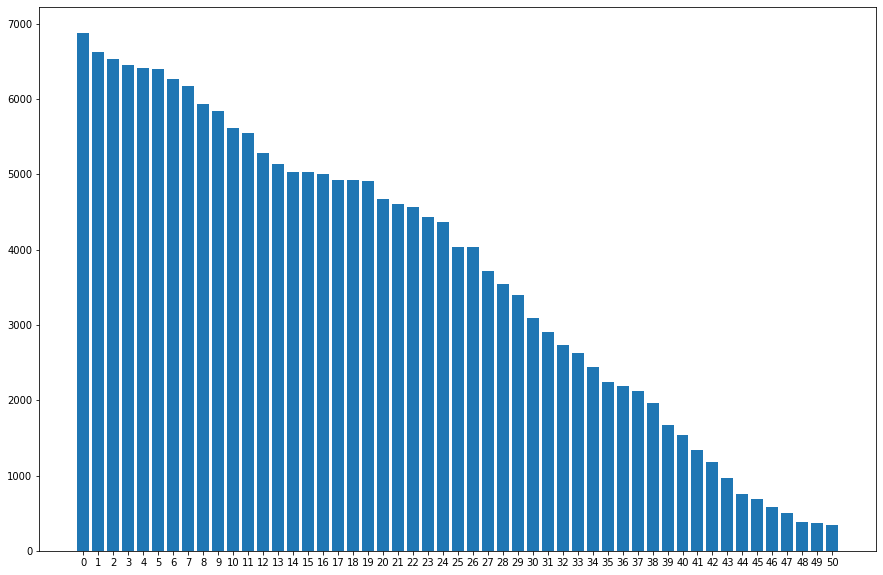

In [10]:

y = time_kills.value_counts()
y = y.reset_index()
y = y.sort_values(by="index")
y = y[y.index < 51 ]
x = timeline

plt.figure(figsize=(15,10))
plt.bar(y.index,y.Time)
plt.xticks(timeline)

plt.show()

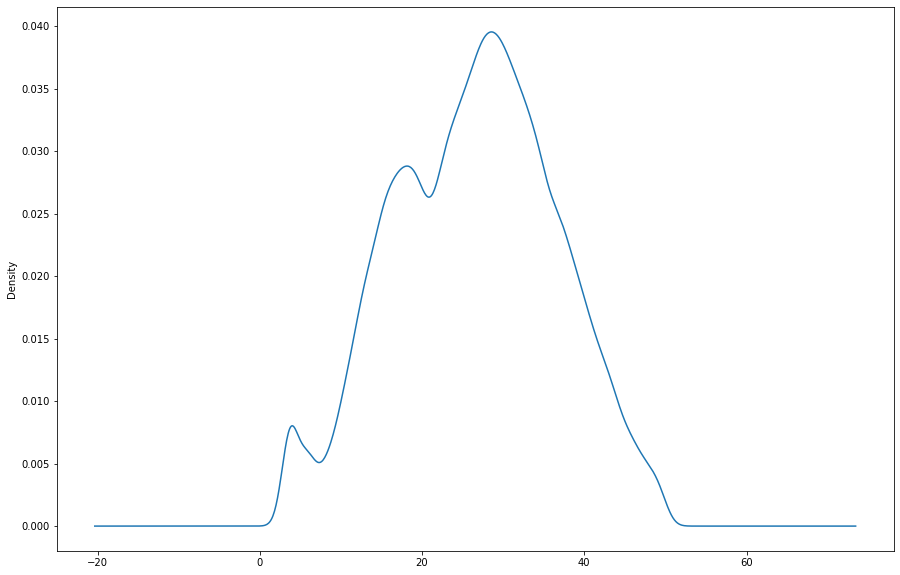

In [11]:

plt.figure(figsize=(15,10))

ax = df_structure[(df_structure.Time > -1)&(df_structure.Time <= 50)].Time.plot.kde()
plt.show()


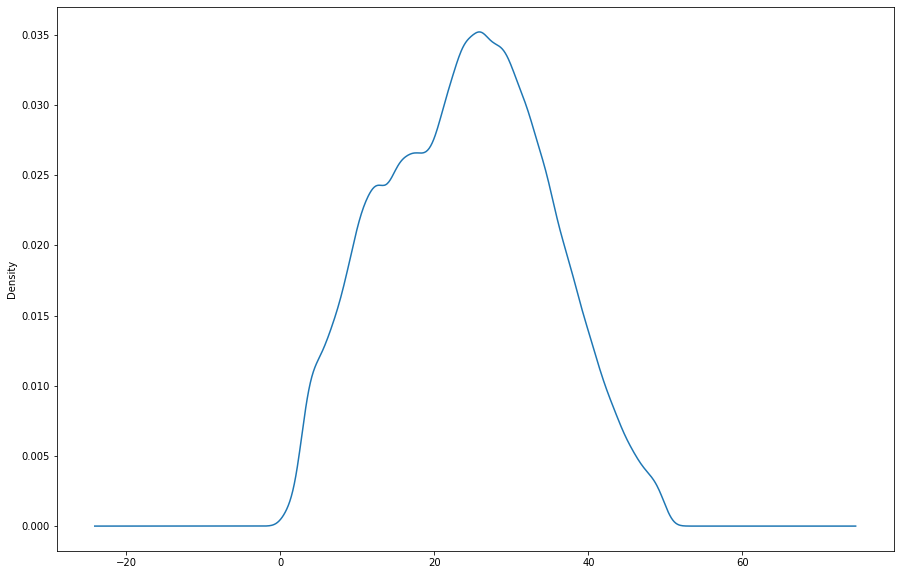

In [12]:

plt.figure(figsize=(15,10))

df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde()

plt.show()


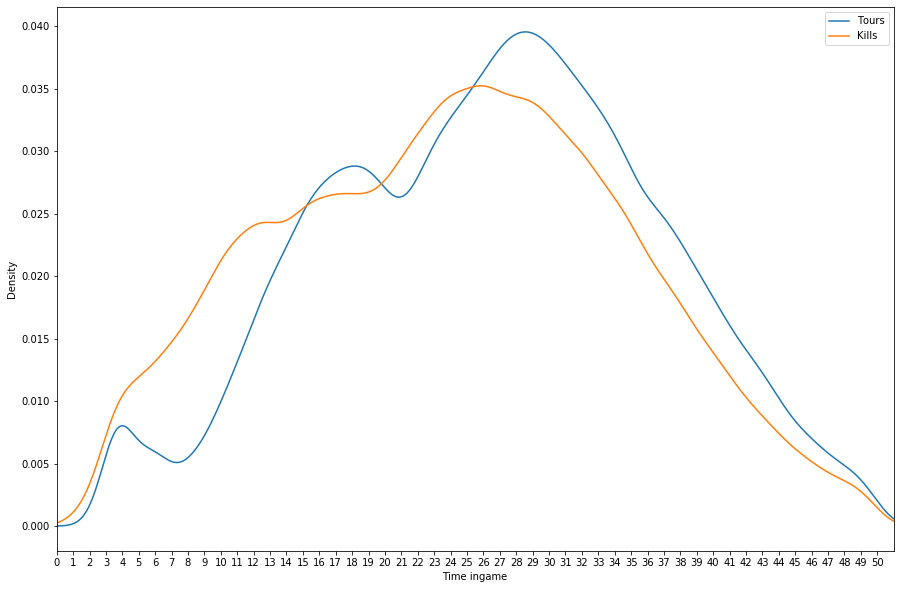

In [23]:

plt.figure(figsize=(15,10))

ax = df_structure[(df_structure.Time > -1)&(df_structure.Time <= 50)].Time.plot.kde(label="Tours")
ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

ax.set_xlim(0,51)

plt.xticks(np.arange(0,51,1))

plt.xlabel("Time ingame")
plt.legend()

plt.show()


In [29]:
df_structure.Type.unique()

array(['BASE_TURRET', 'NEXUS_TURRET', 'INNER_TURRET', 'OUTER_TURRET',
       'FOUNTAIN_TURRET', nan, 'INHIBITOR'], dtype=object)

In [34]:
df_structure.Team.unique()

array(['bTowers', 'rTowers', 'bInhibs', 'rInhibs'], dtype=object)

In [37]:
df_structure[df_structure.Type == "NEXUS_TURRET"].Time

1        39.269
6        39.376
17       39.566
25       39.420
36       34.213
          ...  
97350    38.117
97358    23.285
97359    23.479
97373    41.053
97375    41.317
Name: Time, Length: 15447, dtype: float64

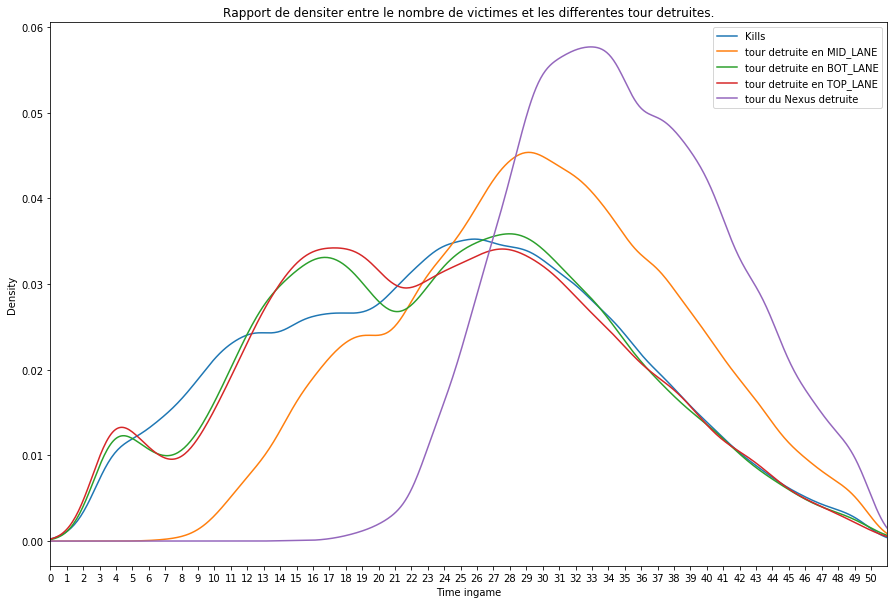

In [42]:

plt.figure(figsize=(15,10))
plt.title("Rapport de densiter entre le nombre de victimes et les differentes tour detruites.")
ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

for i in ['MID_LANE', 'BOT_LANE', 'TOP_LANE']:

    ax = df_structure[(df_structure.Time > -1)&(df_structure.Time <= 50)&(df_structure.Lane == i)].Time.plot.kde(label="tour detruite en {}".format(i))
    

ax = df_structure[(df_structure.Time > -1)&(df_structure.Time <= 50)&(df_structure.Type == "NEXUS_TURRET")].Time.plot.kde(label="tour du Nexus detruite ")
ax.set_xlim(0,51)

plt.xticks(np.arange(0,51,1))
plt.xlabel("Time ingame")
plt.legend()
plt.show()


In [18]:
df_kills_temp = df_kills_temp.drop(df_kills_temp[df_kills_temp.x_pos == 'TooEarly'].index)

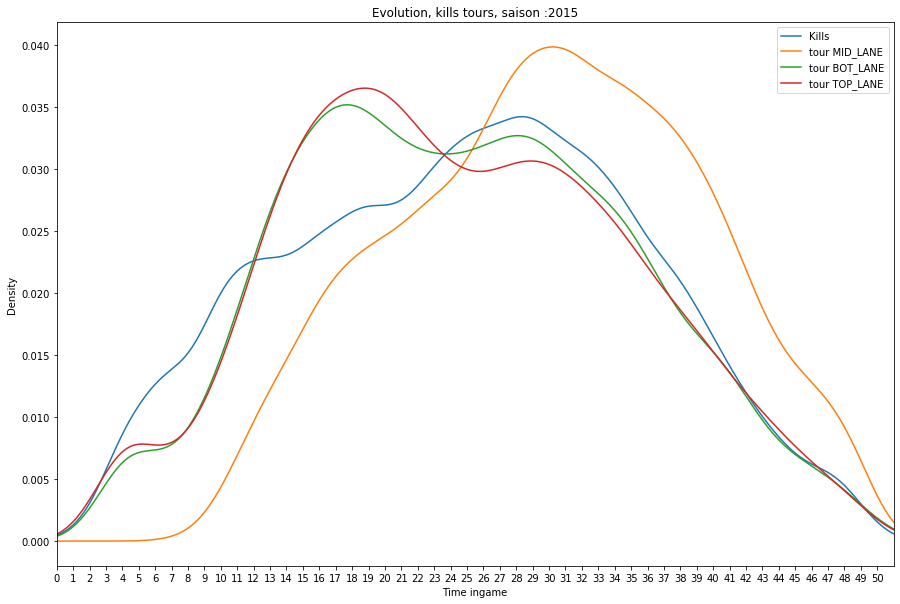

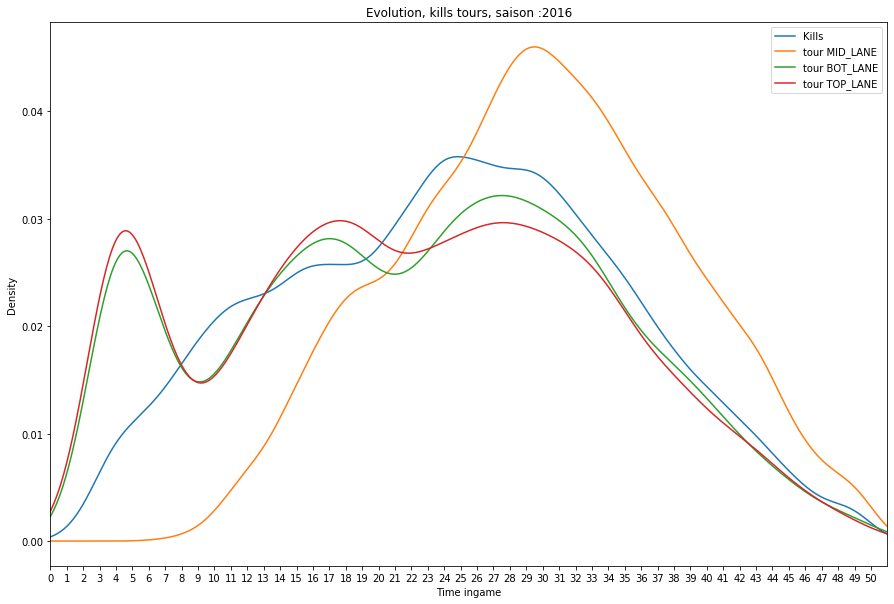

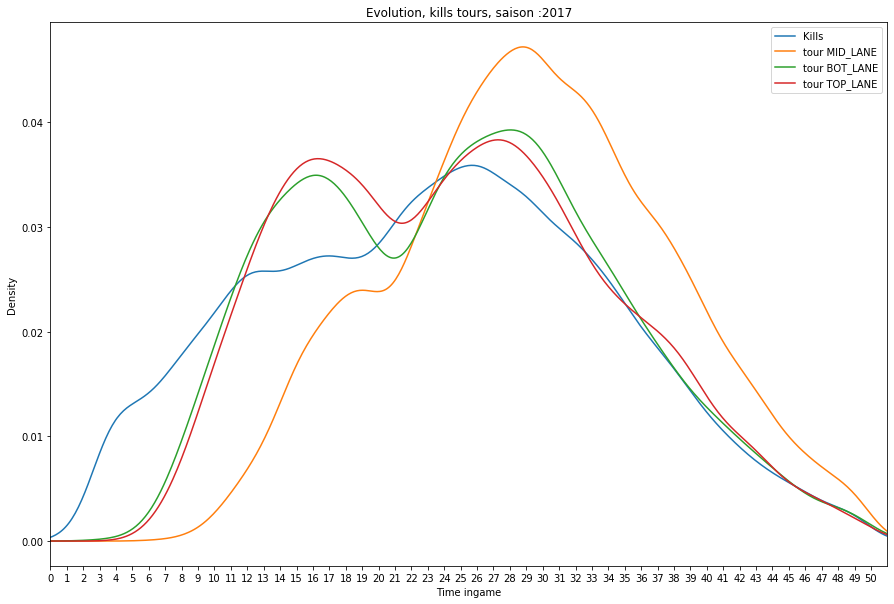

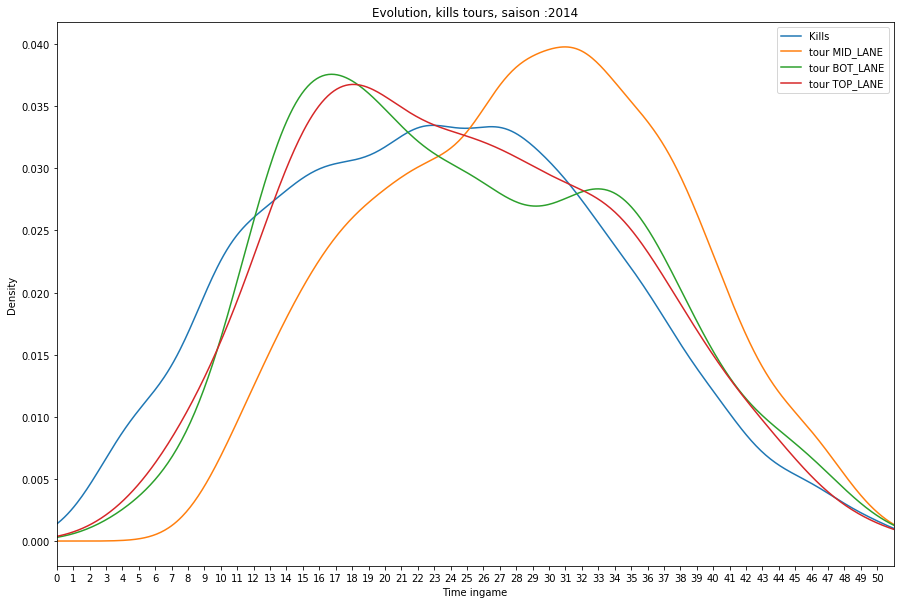

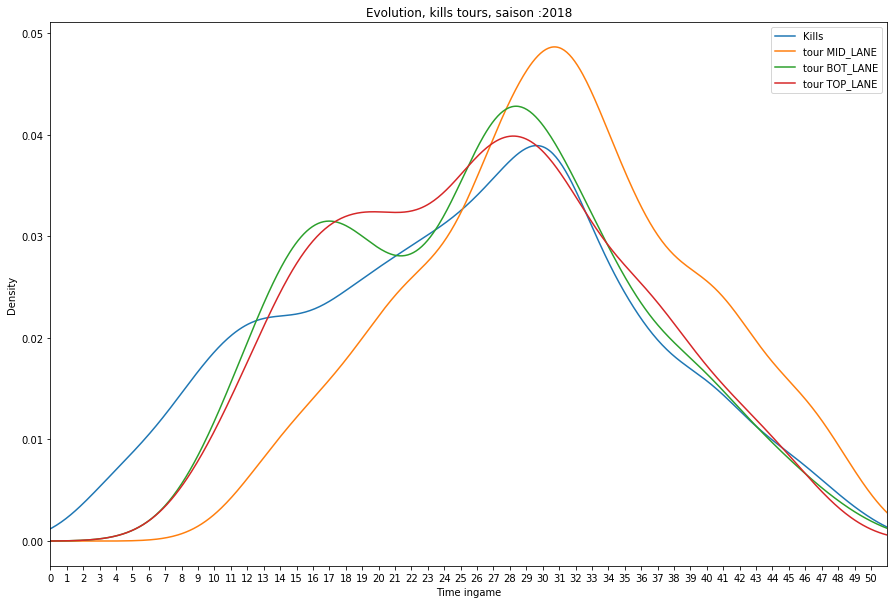

In [19]:

for i in df_kills_temp.Date.dt.year.unique():
    
    plt.figure(figsize=(15,10))
    plt.title("Evolution, kills tours, saison :{}".format(i))
    plt.xlabel("Time ingame")

    df_kills_saison = df_kills_temp[df_kills_temp.Date.dt.year == i]
    df_structure_saison = df_structure[df_structure.Date.dt.year == i]

    ax = df_kills_saison[(df_kills_saison.Time > -1)&(df_kills_saison.Time <= 50)].Time.plot.kde(label="Kills")

    for i in ['MID_LANE', 'BOT_LANE', 'TOP_LANE']:

        ax = df_structure_saison[(df_structure_saison.Time > -1)&(df_structure_saison.Time <= 50)&(df_structure_saison.Lane == i)].Time.plot.kde(label="tour {}".format(i))

        ax.set_xlim(0,51)

        plt.xticks(np.arange(0,51,1))

        plt.legend()

    plt.show()


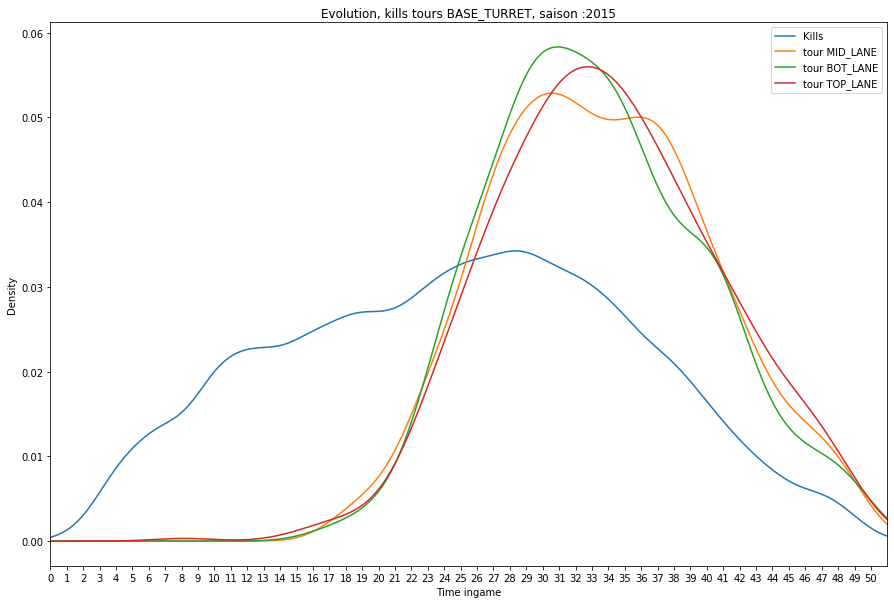

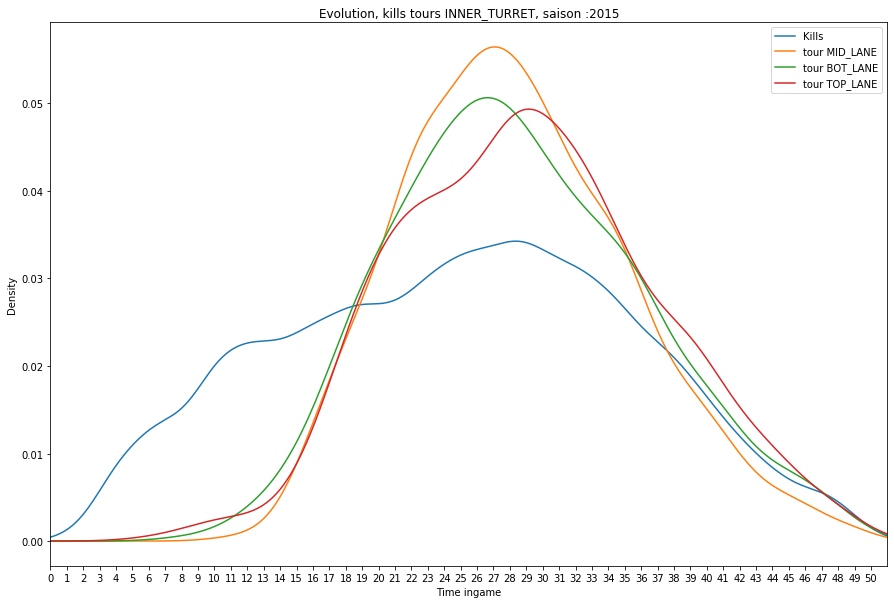

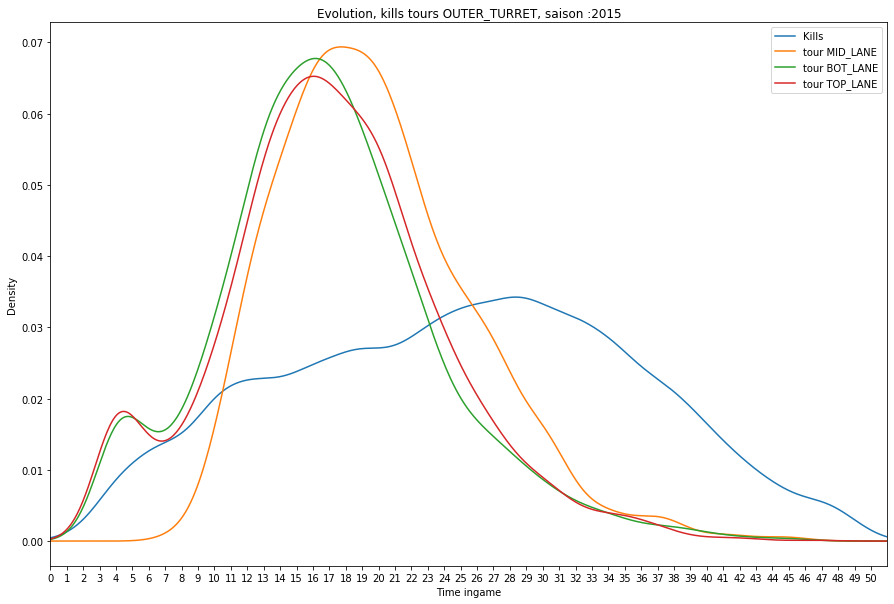

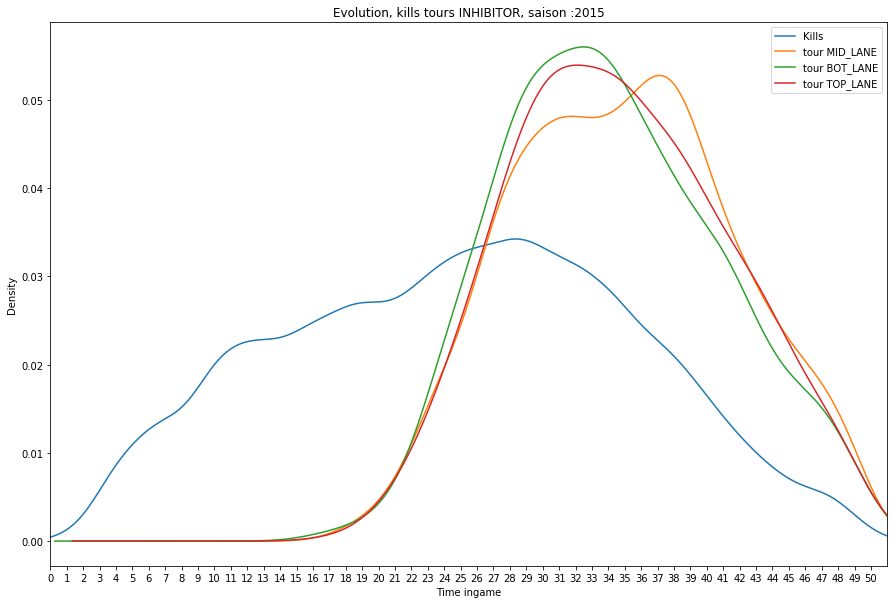

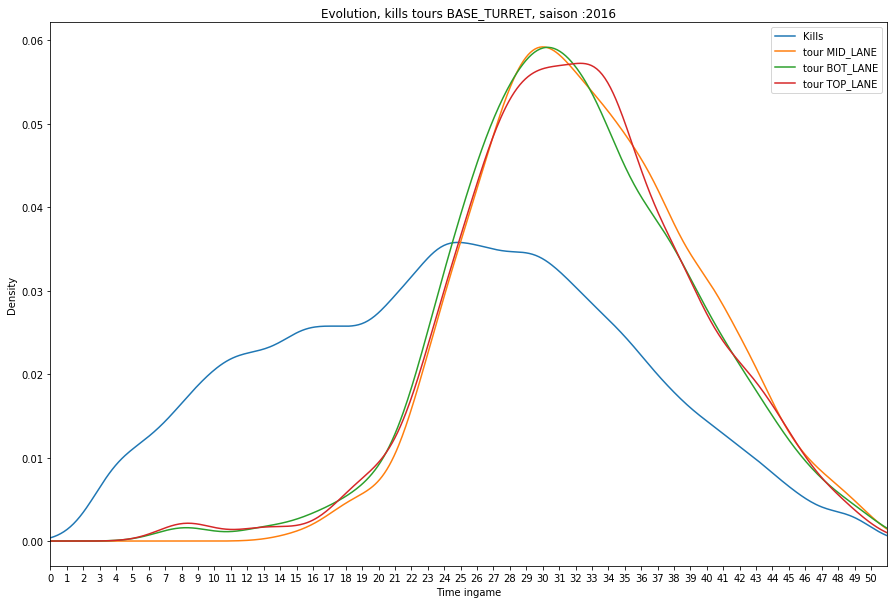

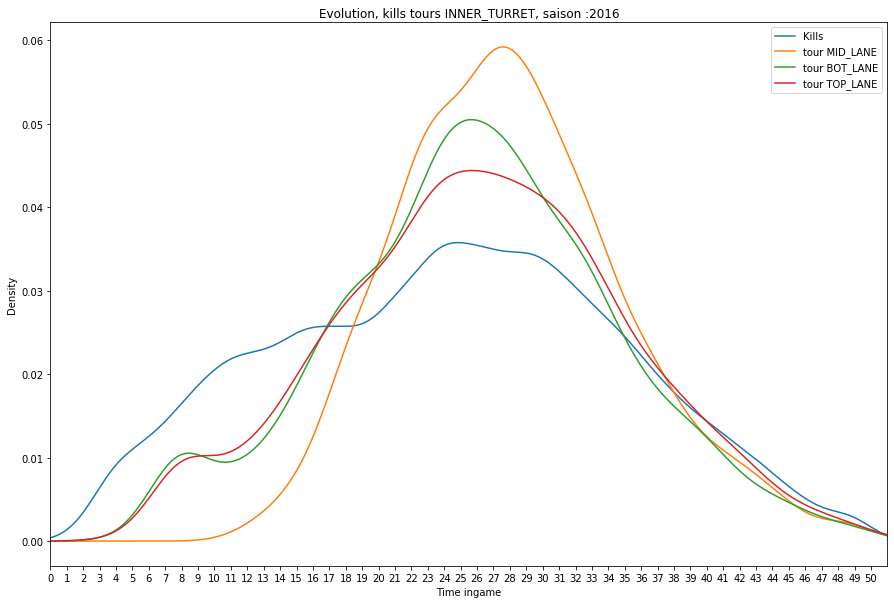

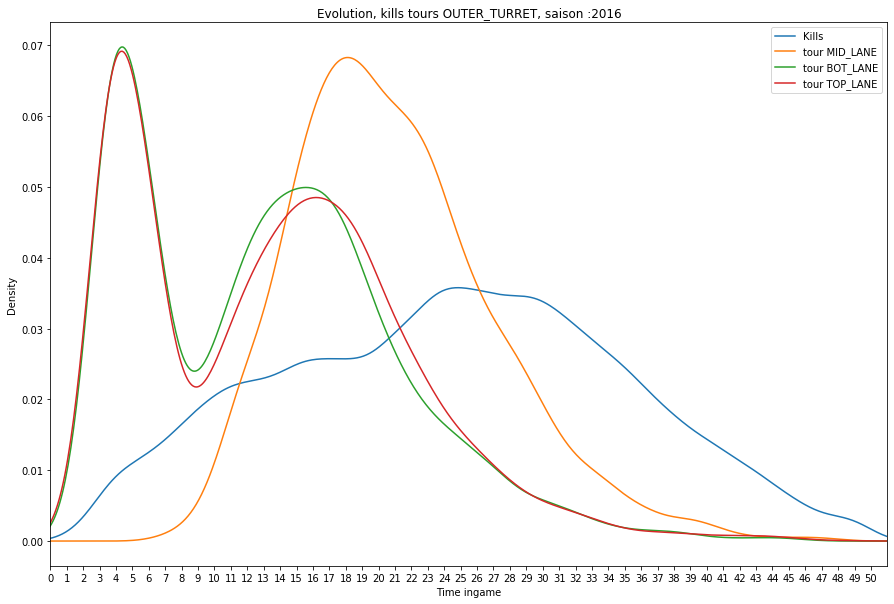

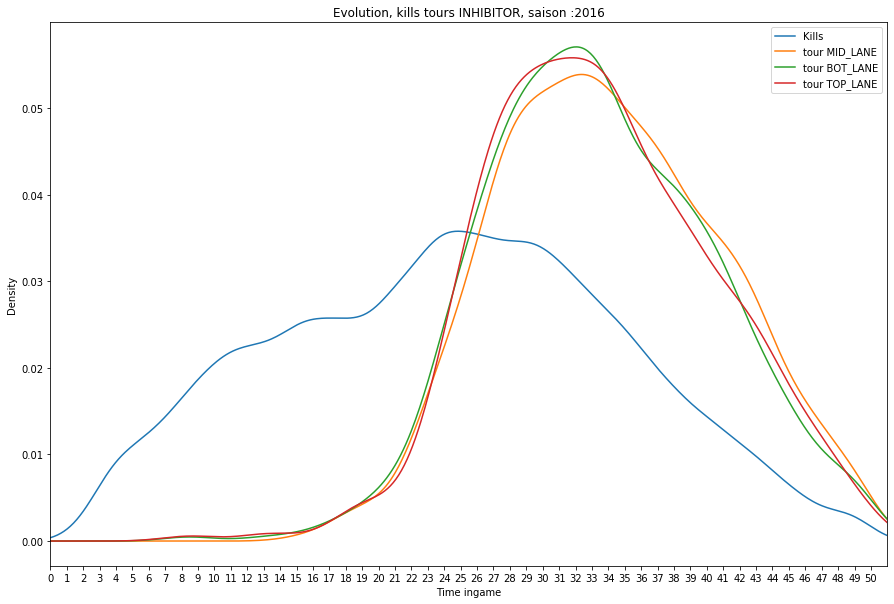

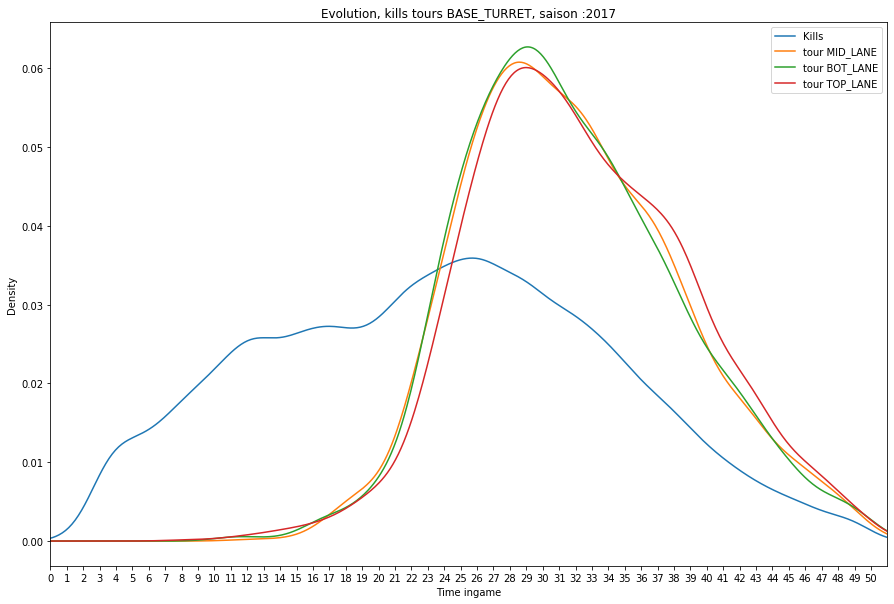

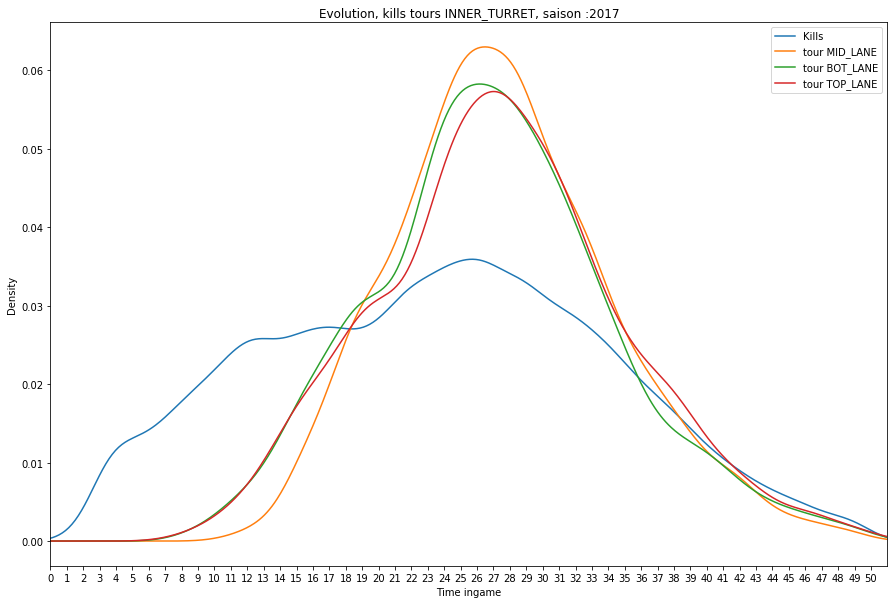

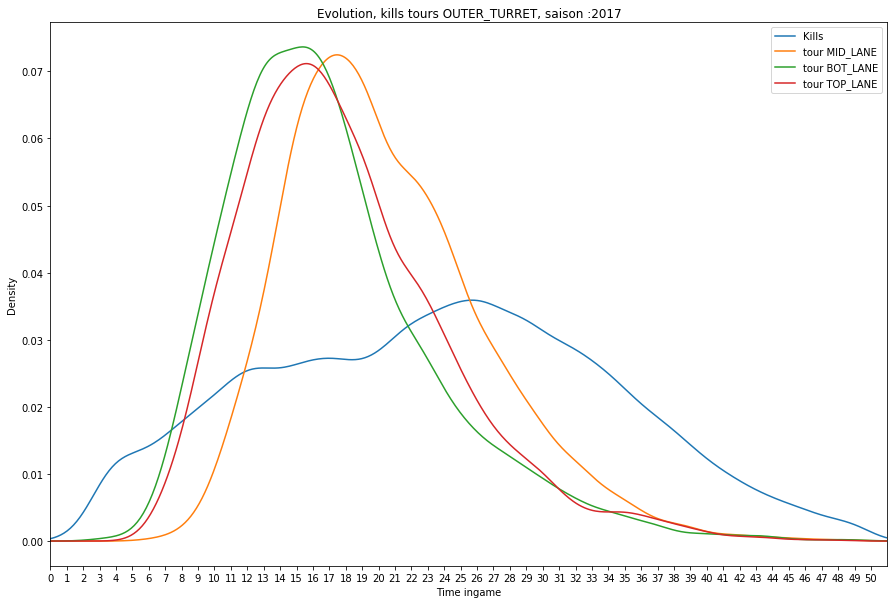

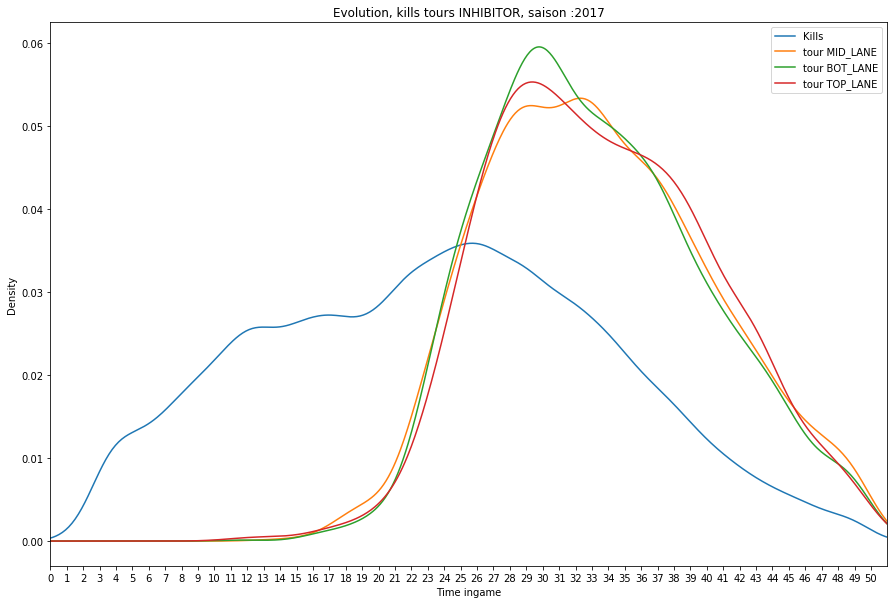

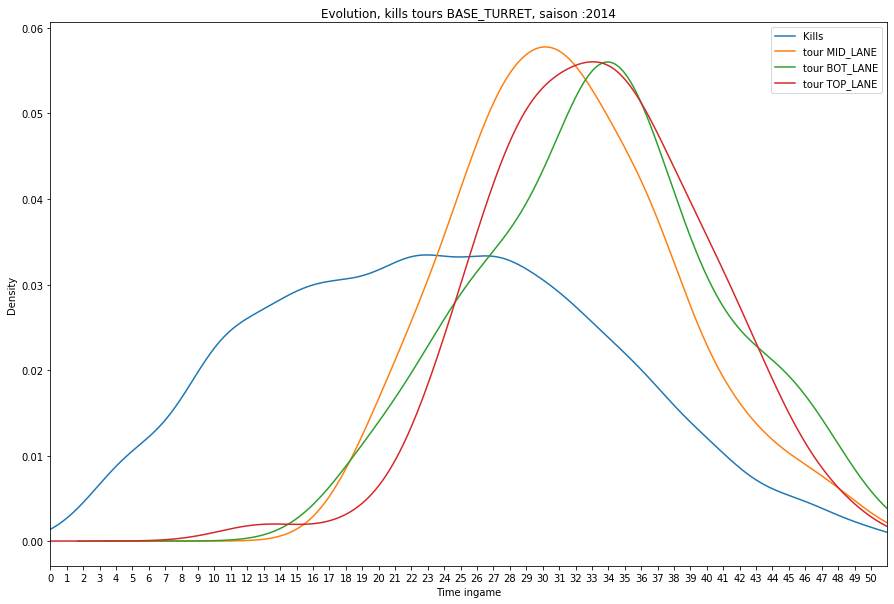

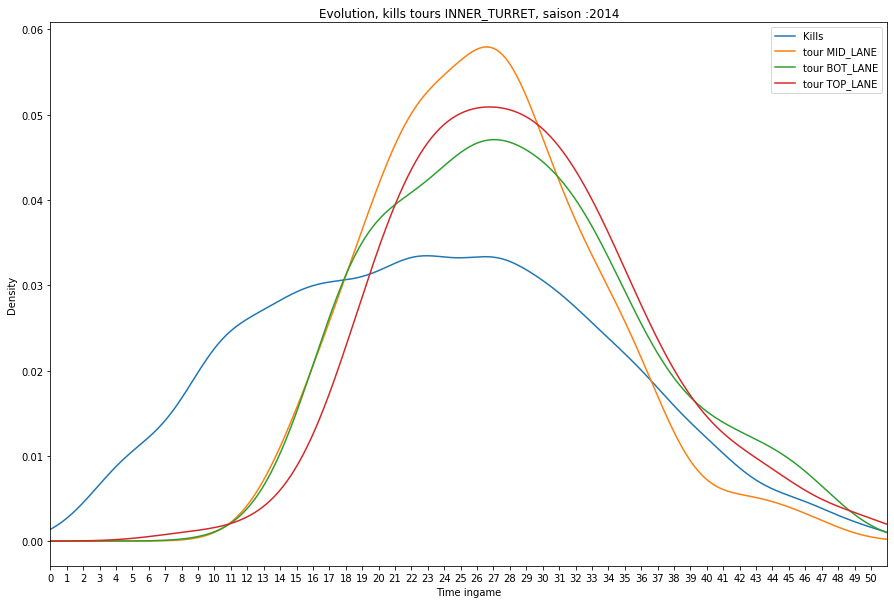

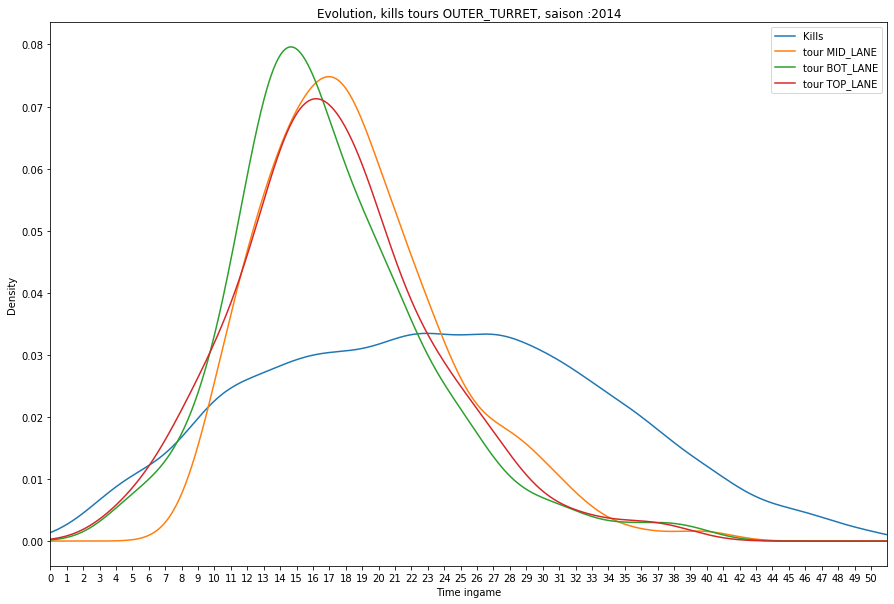

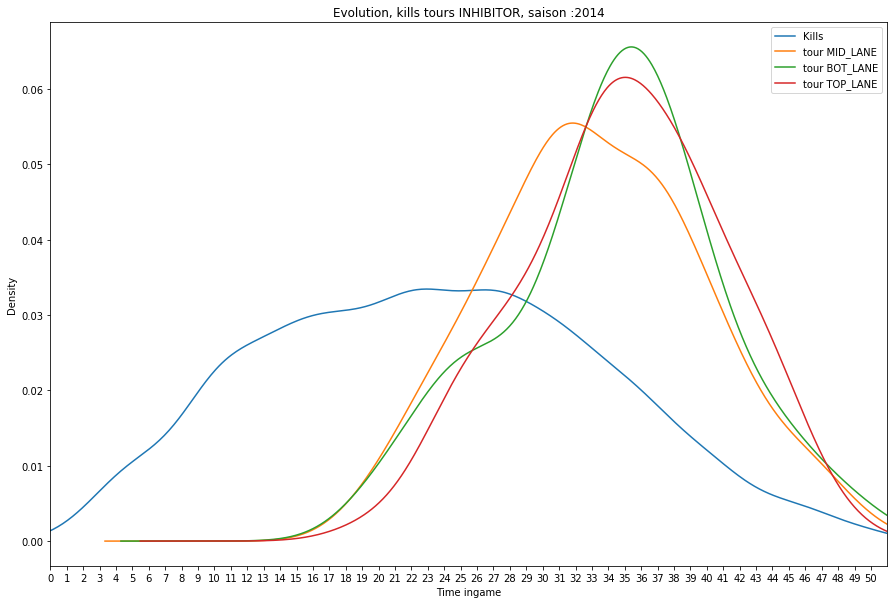

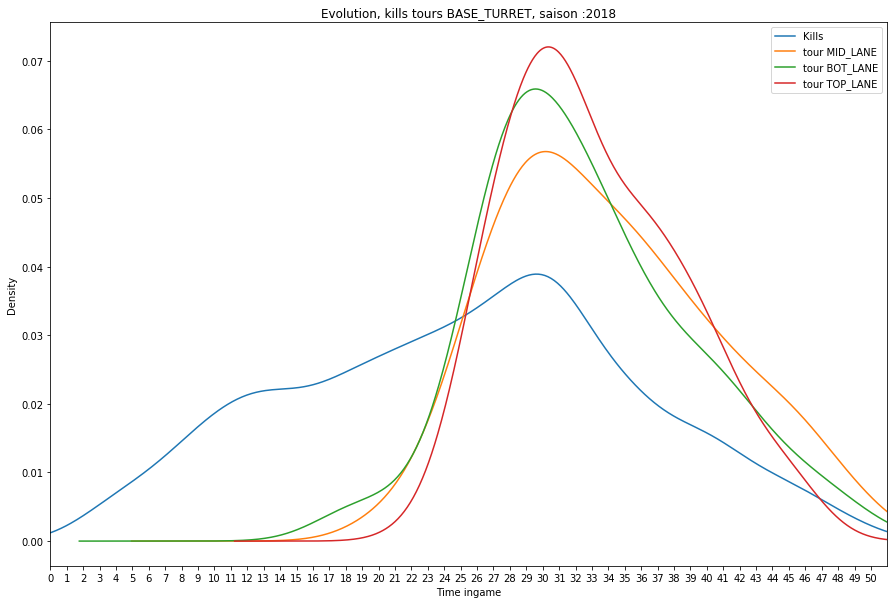

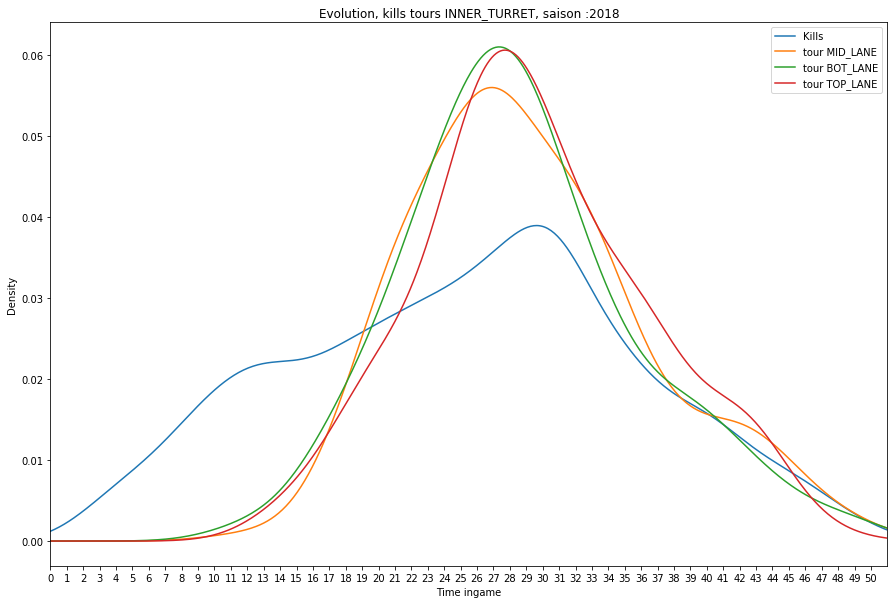

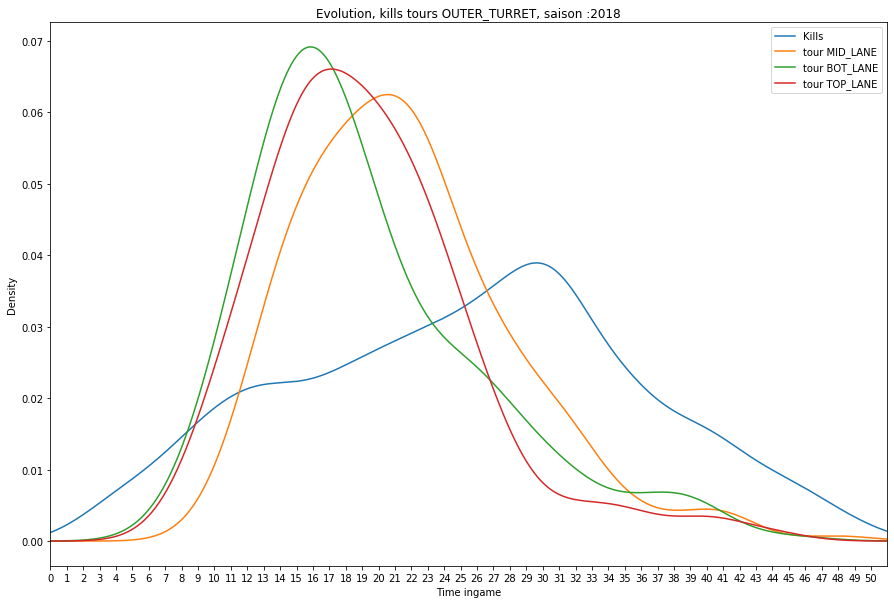

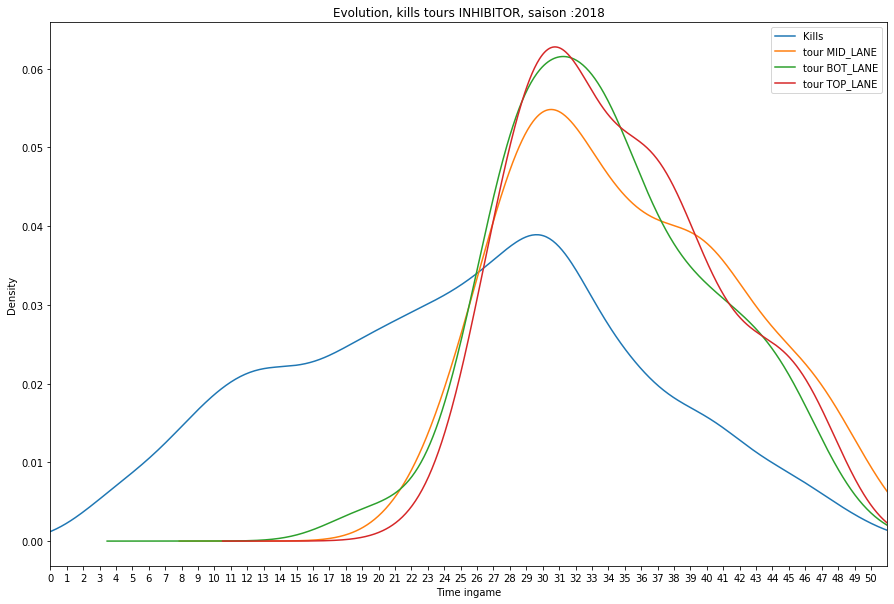

In [20]:

for i in df_kills_temp.Date.dt.year.unique():
    
    for j in ["BASE_TURRET", "INNER_TURRET", "OUTER_TURRET", "INHIBITOR"]:
        
        plt.figure(figsize=(15,10))
        plt.xlabel("Time ingame")

        df_kills_saison = df_kills_temp[df_kills_temp.Date.dt.year == i]
        df_structure_saison = df_structure[(df_structure.Date.dt.year == i)&(df_structure.Type == j)]
        
        ax = df_kills_saison[(df_kills_saison.Time > -1)&(df_kills_saison.Time <= 50)].Time.plot.kde(label="Kills")
        
        plt.title("Evolution, kills tours {}, saison :{}".format(j,i))

        for h in ['MID_LANE', 'BOT_LANE', 'TOP_LANE']:

            ax = df_structure_saison[(df_structure_saison.Time > -1)&(df_structure_saison.Time <= 50)&(df_structure_saison.Lane == h)].Time.plot.kde(label="tour {}".format(h))

            ax.set_xlim(0,51)

            plt.xticks(np.arange(0,51,1))

            plt.legend()

        plt.show()
        
        

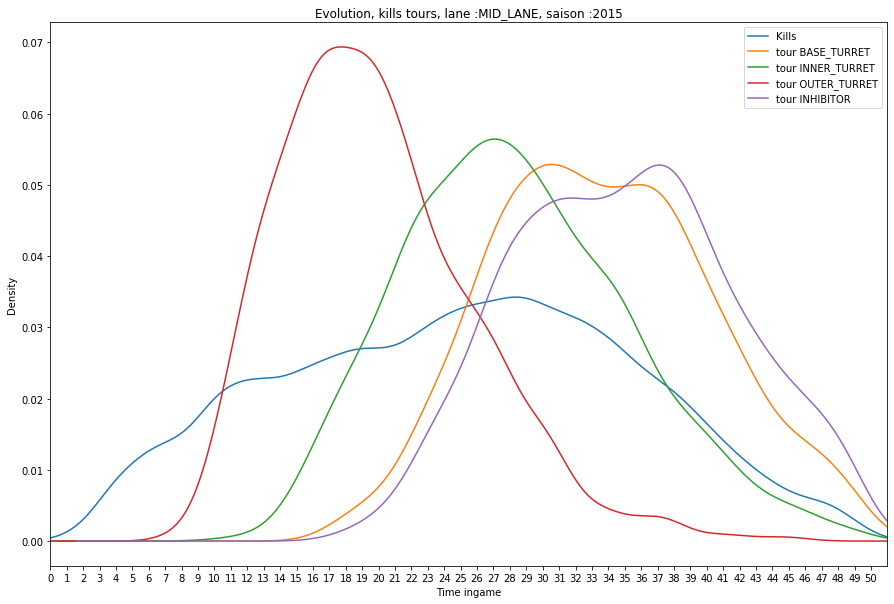

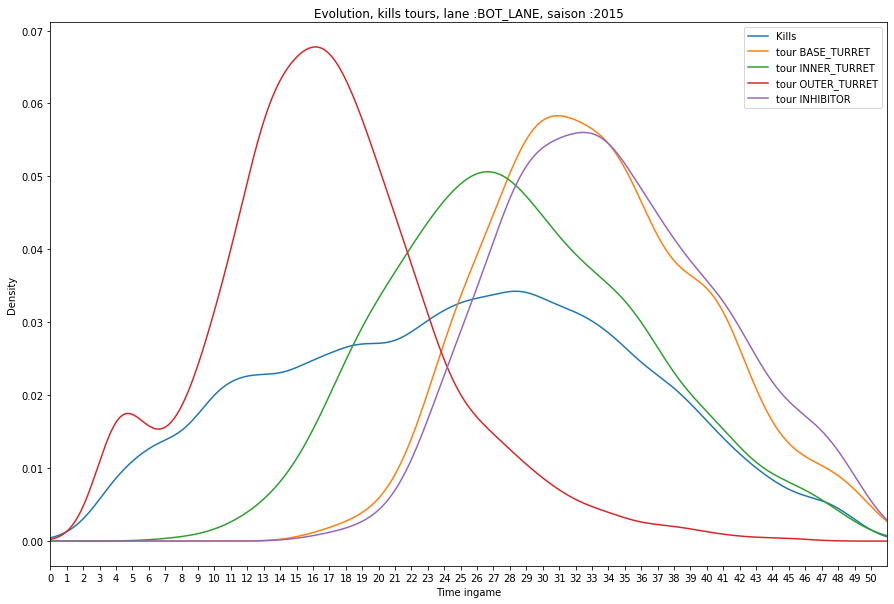

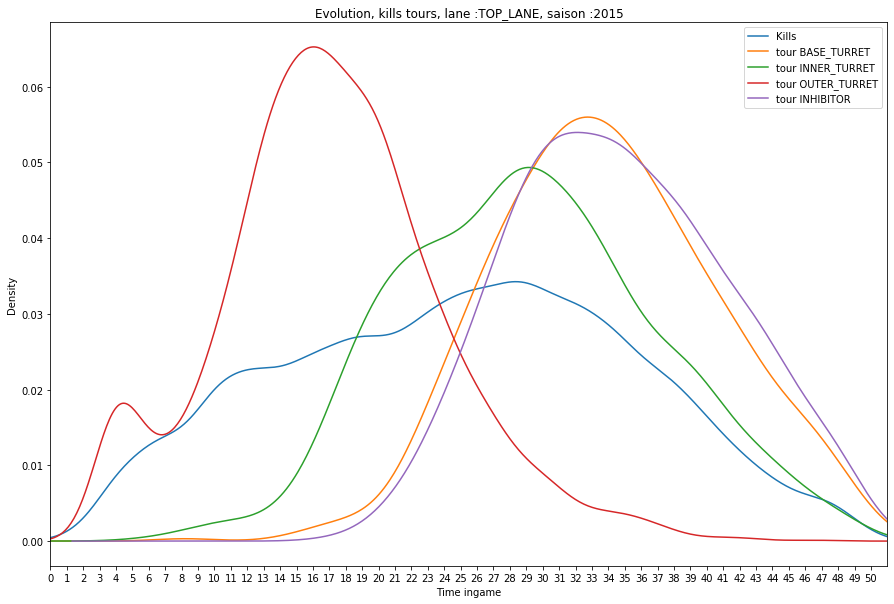

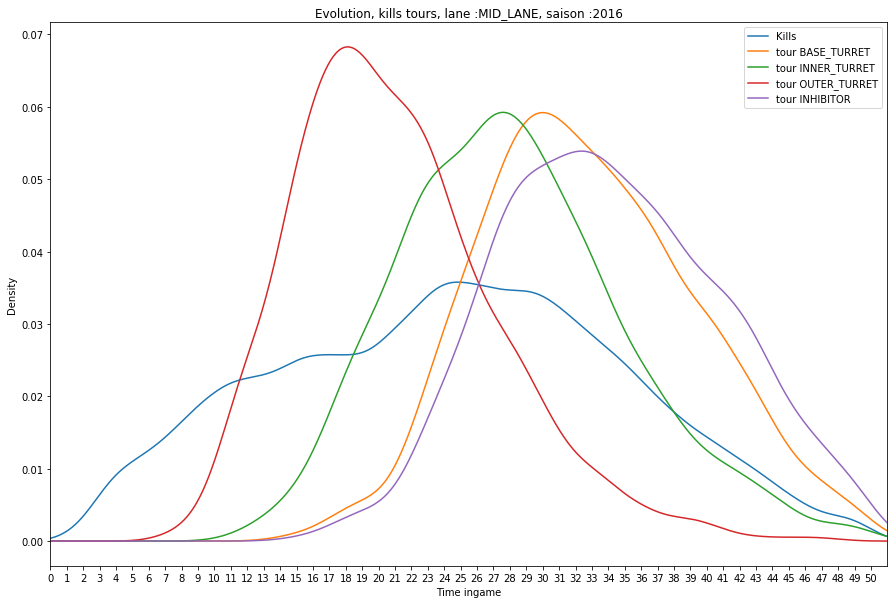

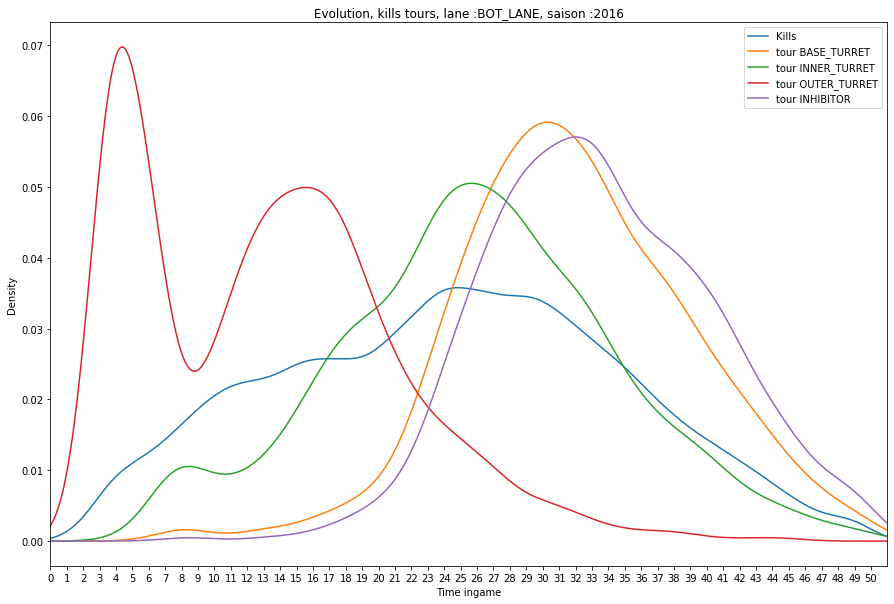

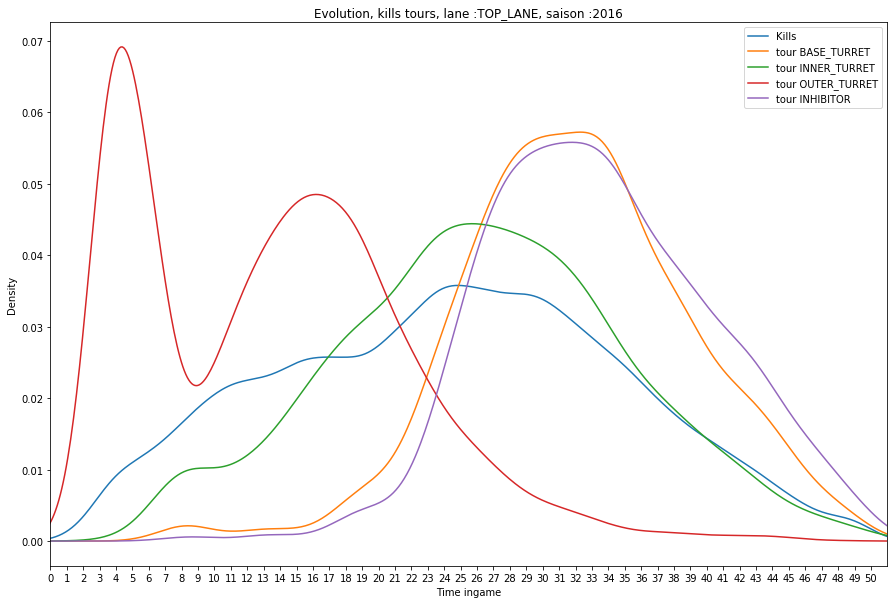

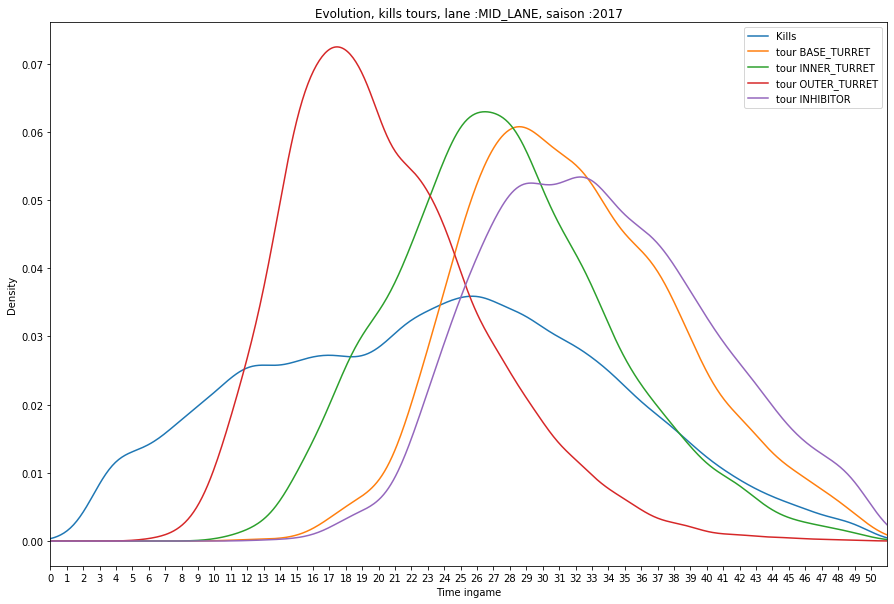

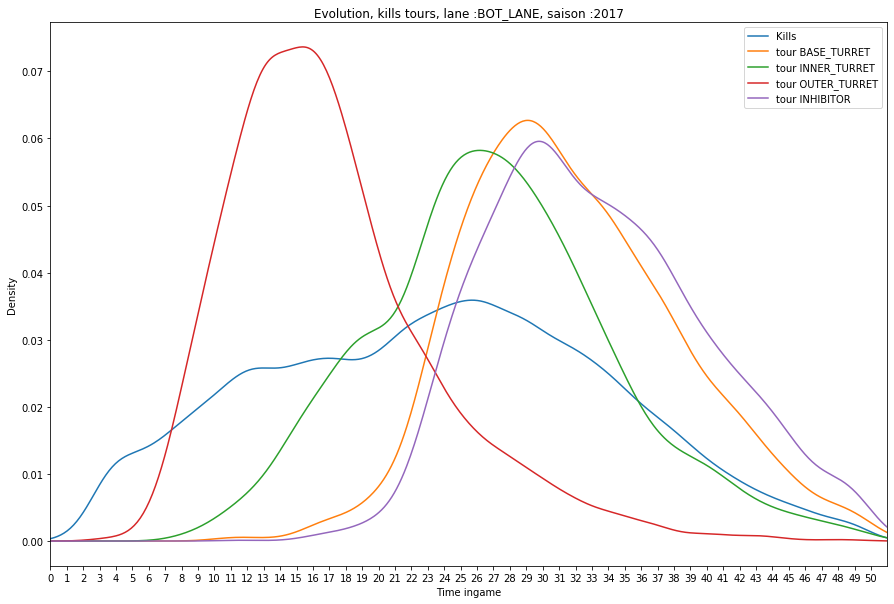

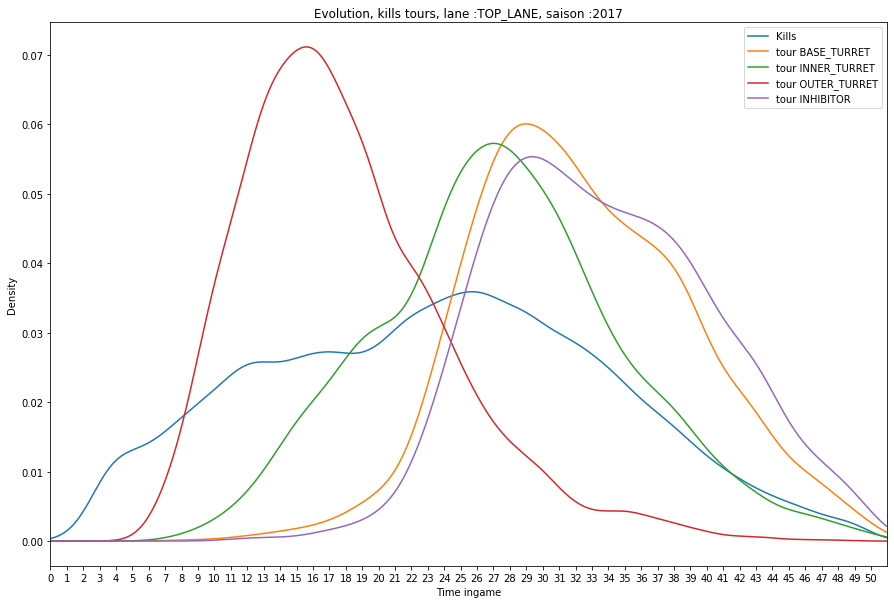

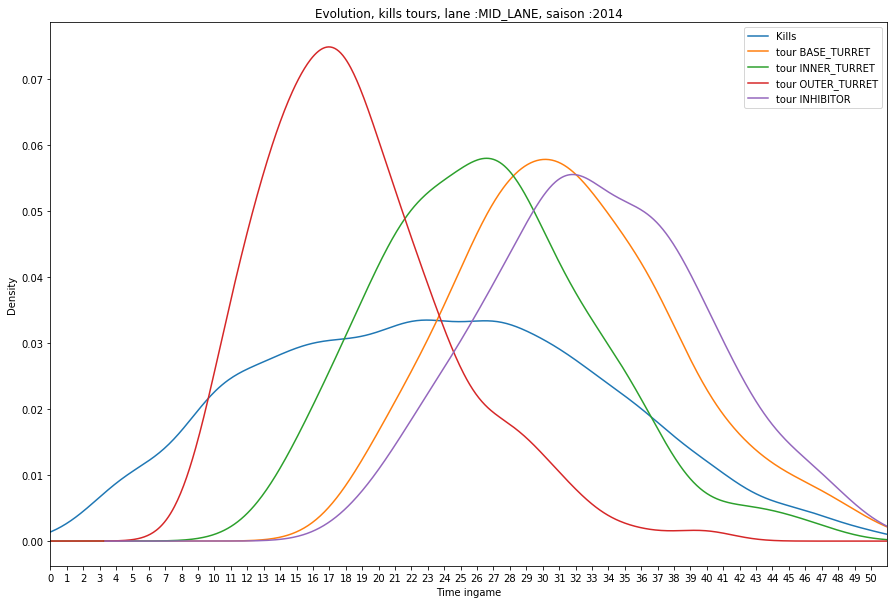

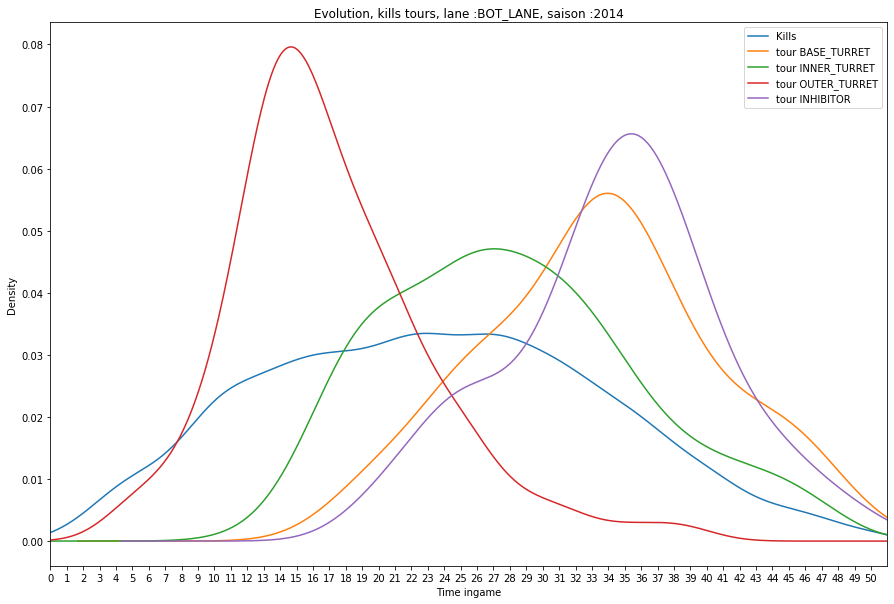

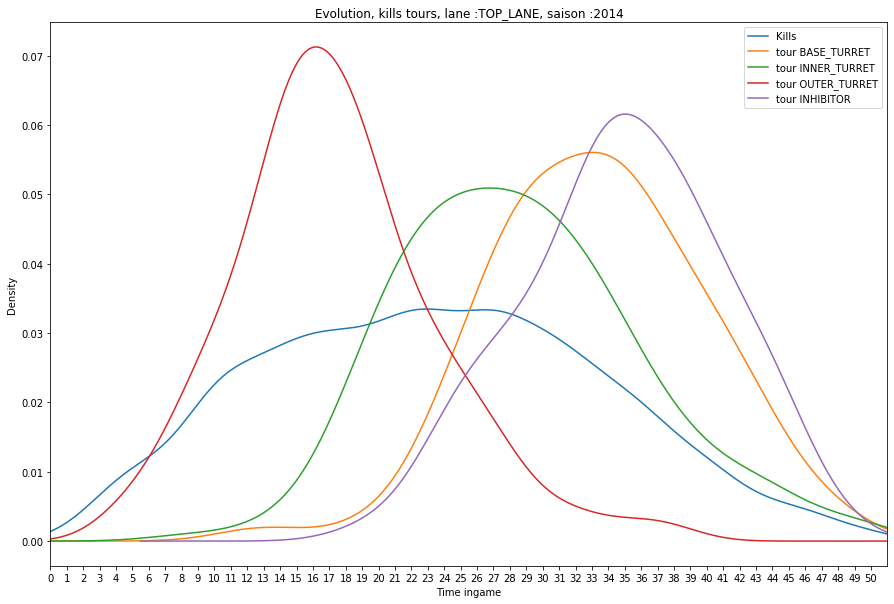

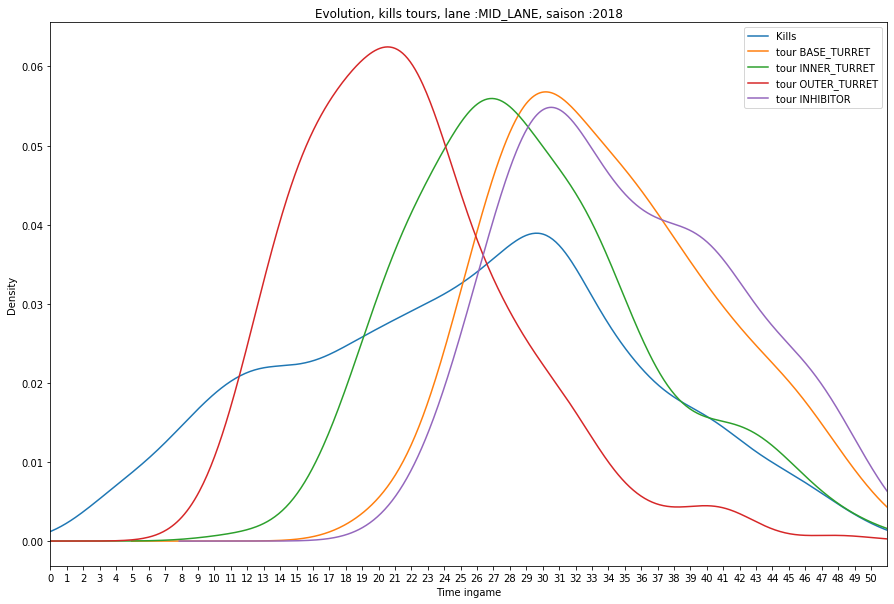

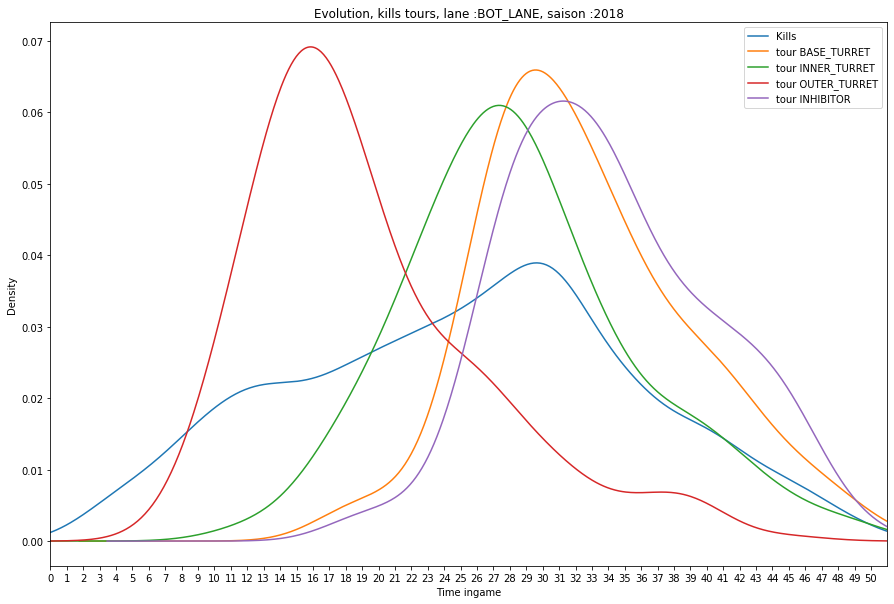

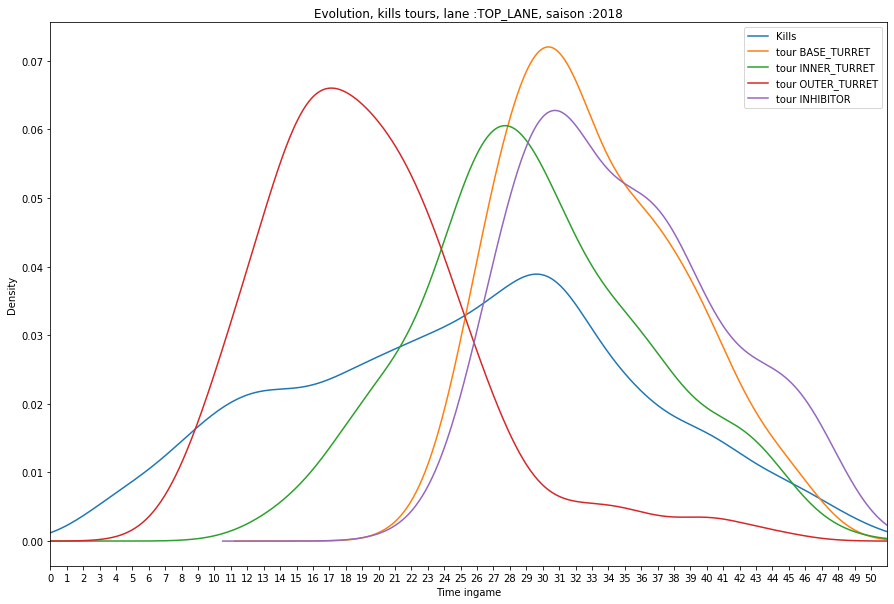

In [21]:

for i in df_kills_temp.Date.dt.year.unique():
    
    for j in ['MID_LANE', 'BOT_LANE', 'TOP_LANE']:
        
        plt.figure(figsize=(15,10))
        plt.xlabel("Time ingame")

        df_kills_saison = df_kills_temp[df_kills_temp.Date.dt.year == i]
        df_structure_saison = df_structure[(df_structure.Date.dt.year == i)&(df_structure.Lane == j)]
        
        ax = df_kills_saison[(df_kills_saison.Time > -1)&(df_kills_saison.Time <= 50)].Time.plot.kde(label="Kills")
        
        plt.title("Evolution, kills tours, lane :{}, saison :{}".format(j,i))

        for h in ["BASE_TURRET", "INNER_TURRET", "OUTER_TURRET", "INHIBITOR"]:

            ax = df_structure_saison[(df_structure_saison.Time > -1)&(df_structure_saison.Time <= 50)&(df_structure_saison.Type == h)].Time.plot.kde(label="tour {}".format(h))

            ax.set_xlim(0,51)

            plt.xticks(np.arange(0,51,1))

            plt.legend()

        plt.show()
        
        

In [22]:
#Tracer moyen du graph precedent.
# Nombre moyen de kills, plus temps moyen de kills.

